## **IMPORTE**

In [1]:
import pandas as pd

train = pd.read_csv(filepath_or_buffer="../data/train.csv")
test = pd.read_csv(filepath_or_buffer="../data/test.csv")

## **INTEGRAÇÃO DE DADOS**

In [2]:
# Verificação de integração dos sets de treino e teste
print(train.shape)
print(test.shape)
print(train.columns.to_list() == test.columns.to_list())

(2742, 34)
(305, 34)
True


In [3]:
# Já foi verificado antes, e não há features com relação temporal
# Permitidno a concatenção e embaralhamento do dataset inteiro
df = pd.concat(objs=[train, test], axis=0, ignore_index=True, copy=True)
df.head()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
0,170.0,76,456.6,40012,27451,16.1,0.000000,"(37413.8, 40362.7]",43.2,42.1,...,41.6,39.4,23.3,94.815349,3.145379,0.299045,0.169339,42.973813,7.391231,198.4
1,232.0,84,480.5,54441,43011,11.4,0.000000,"(51046.4, 54545.6]",38.2,37.1,...,49.4,33.6,15.6,91.939506,1.547317,1.242048,2.395544,55.221780,6.572521,170.9
2,652.0,325,371.0,57719,149568,10.4,608.418913,"(54545.6, 61494.5]",41.7,41.0,...,55.4,31.1,14.0,94.608338,2.322582,0.616874,0.607567,54.451388,6.102217,182.8
3,44.0,20,472.2,42624,6561,14.1,0.000000,"(40362.7, 42724.4]",44.8,43.3,...,48.2,34.3,16.5,94.220955,5.028520,0.000000,0.000000,53.596021,5.213270,220.5
4,581.0,230,467.1,46849,97631,16.6,0.000000,"(45201, 48021.6]",42.0,41.5,...,45.4,39.9,20.7,94.978969,1.566918,1.529418,0.334465,46.999367,6.856742,178.7


### **EDA EM DADOS UNIVARIADOS**
- Exploração de dados, analisando as variáveis independentes de forma isolada.

### VALORES FALTANTES

In [4]:
pd.DataFrame(data={
    "Percentual (%)": round((df.isnull().sum()[(df.isnull().sum() > 0)] / df.shape[0]) * 100, 2),
    "Quantidade": df.isnull().sum()[(df.isnull().sum() > 0)]
})

,Percentual (%),Quantidade
pctsomecol18_24,74.99,2285
pctemployed16_over,4.99,152
pctprivatecoveragealone,19.99,609


### ANÁLISE DE OUTLIERS

array([[<Axes: title={'center': 'avganncount'}>,
        <Axes: title={'center': 'avgdeathsperyear'}>,
        <Axes: title={'center': 'incidencerate'}>,
        <Axes: title={'center': 'medincome'}>,
        <Axes: title={'center': 'popest2015'}>,
        <Axes: title={'center': 'povertypercent'}>],
       [<Axes: title={'center': 'studypercap'}>,
        <Axes: title={'center': 'medianage'}>,
        <Axes: title={'center': 'medianagemale'}>,
        <Axes: title={'center': 'medianagefemale'}>,
        <Axes: title={'center': 'avghouseholdsize'}>,
        <Axes: title={'center': 'percentmarried'}>],
       [<Axes: title={'center': 'pctnohs18_24'}>,
        <Axes: title={'center': 'pcths18_24'}>,
        <Axes: title={'center': 'pctsomecol18_24'}>,
        <Axes: title={'center': 'pctbachdeg18_24'}>,
        <Axes: title={'center': 'pcths25_over'}>,
        <Axes: title={'center': 'pctbachdeg25_over'}>],
       [<Axes: title={'center': 'pctemployed16_over'}>,
        <Axes: title={'ce

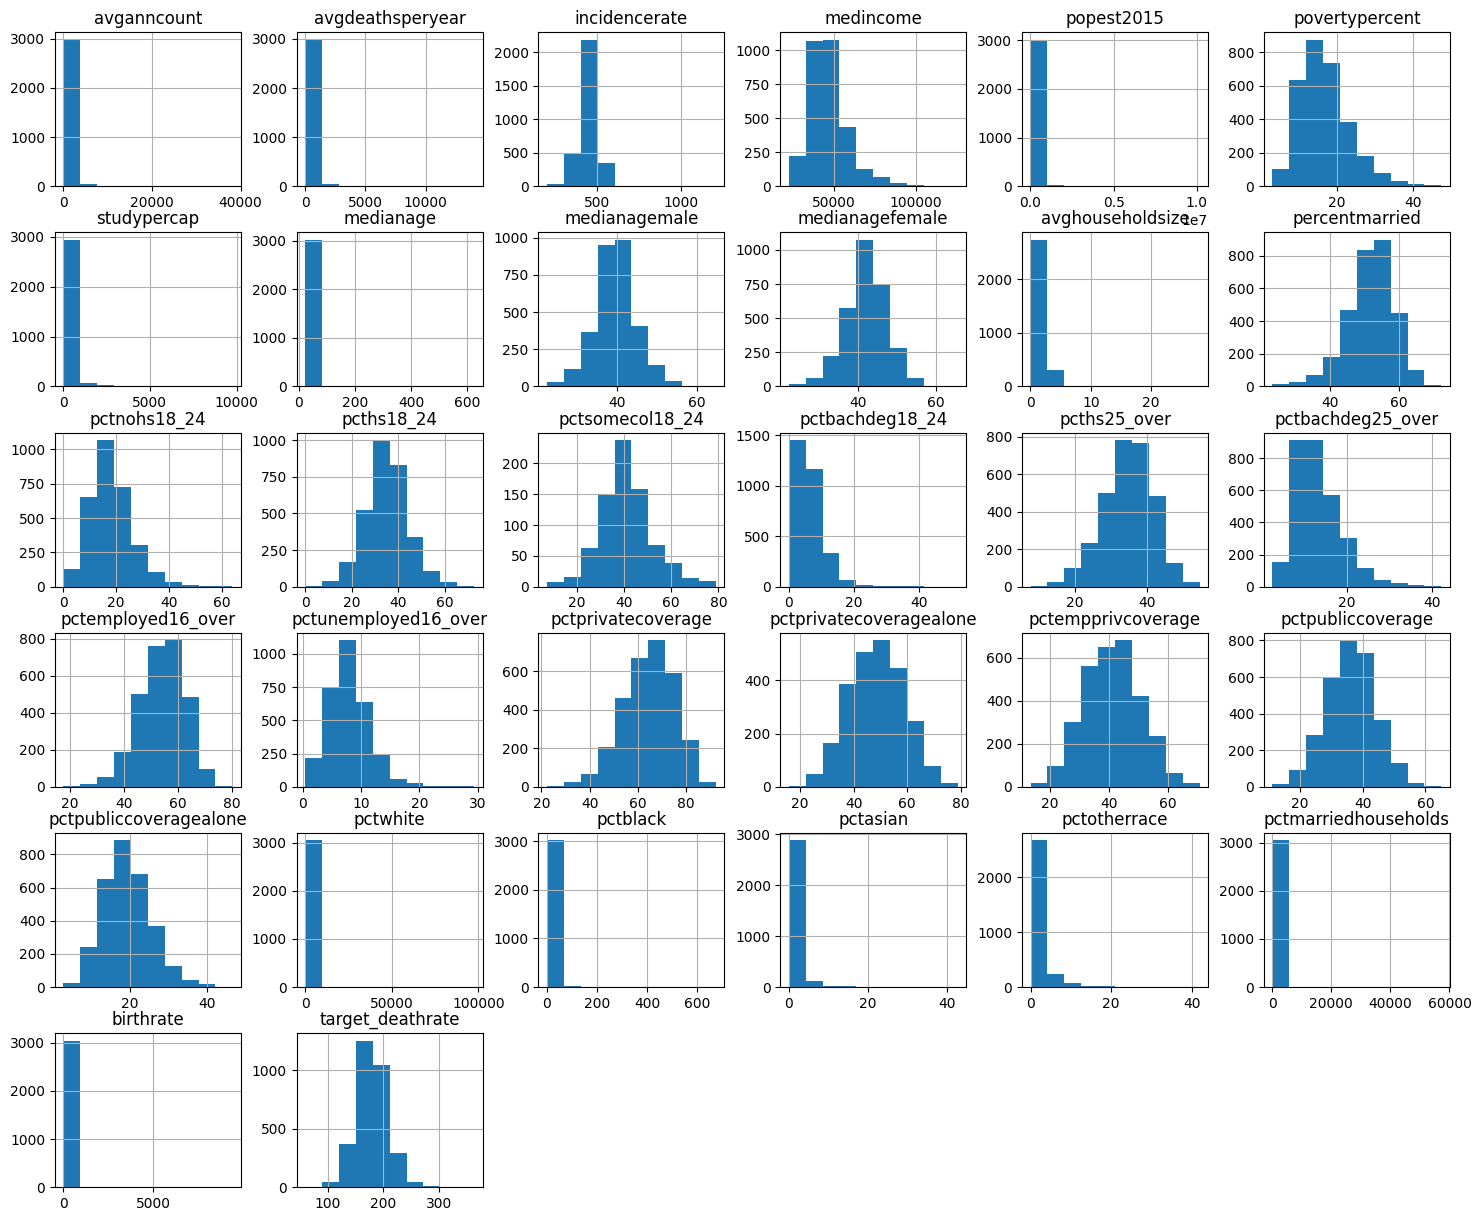

In [5]:
df.hist(figsize=(18,15))

## **EDA PARA DADOS MULTIVARIADOS**
- Exploração de dados, onde a análise é focada na relação entre os atributos e sua influência na variável dependente.

### NORMALIZAÇÃO DOS DADOS

In [7]:
# Análise baseada na diferença de intervalos entre as features
df.describe().iloc[3:, :]

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
min,6.0,3.0,201.300000,22640.0,827.0,3.20,0.000000,22.3,22.40,22.3,...,13.5,11.20,2.60,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,59.7
25%,76.0,28.0,420.300000,38882.5,11684.0,12.15,0.000000,37.7,36.35,39.1,...,34.5,30.90,14.85,77.322235,0.620675,0.254199,0.295172,47.763063,4.521419,161.2
50%,171.0,61.0,453.549422,45207.0,26643.0,15.90,0.000000,41.0,39.60,42.4,...,41.1,36.30,18.80,90.064949,2.257525,0.549812,0.826185,51.669941,5.381478,178.1
75%,518.0,149.0,480.850000,52492.0,68671.0,20.40,83.650776,44.0,42.50,45.3,...,47.7,41.55,23.10,95.461797,10.529628,1.221037,2.177960,55.397104,6.500593,195.2
max,38150.0,14010.0,1206.900000,125635.0,10170292.0,47.40,9762.308998,624.0,64.70,65.7,...,70.7,65.10,46.60,97625.000000,675.000000,42.619425,41.930251,57275.000000,9375.000000,362.8


### DADOS INCONSISTENTES

In [68]:
# Verificando se há mais de uma amostra por condado
df['geography'].value_counts()

geography
Gillespie County, Texas          1
Mineral County, West Virginia    1
Muscatine County, Iowa           1
Monroe County, Michigan          1
Bland County, Virginia           1
                                ..
Fayette County, Pennsylvania     1
Franklin County, Illinois        1
Pittsburg County, Oklahoma       1
Lavaca County, Texas             1
Palm Beach County, Florida       1
Name: count, Length: 3047, dtype: int64

### DADOS DUPLICADOS

In [69]:
# Check de amostras duplicadas
df[(df.duplicated())]

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,...,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate


### MATRIZ DE CORRELAÇÃO